## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.539282  0.103318  1.707347 -1.472914 -0.091048  0.323893
1 -0.097410  1.574256 -1.211123 -0.860914  0.901513  1.088320
2  1.812473  0.875376  1.215064 -0.712920  0.360700 -0.121655
3  1.163431  0.575976 -1.291807  1.620191 -1.413713  1.852565
4  0.352788 -0.527206 -0.693189 -0.755789  1.447104  0.175094


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0050801	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9944631	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9847094	total: 70.4ms	remaining: 23.4s
3:	learn: 0.9750397	total: 71.3ms	remaining: 17.7s
4:	learn: 0.9669951	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9566304	total: 72.5ms	remaining: 12s
6:	learn: 0.9451395	total: 73ms	remaining: 10.4s
7:	learn: 0.9349038	total: 73.6ms	remaining: 9.13s
8:	learn: 0.9255488	total: 74.1ms	remaining: 8.16s
9:	learn: 0.9169878	total: 74.7ms	remaining: 7.4s
10:	learn: 0.9073726	total: 75.2ms	remaining: 6.76s
11:	learn: 0.8975438	total: 75.9ms	remaining: 6.25s
12:	learn: 0.8875657	total: 76.3ms	remaining: 5.79s
13:	learn: 0.8787359	total: 76.7ms	remaining: 5.4s
14:	learn: 0.8717693	total: 77.3ms	remaining: 5.08s
15:	learn: 0.8635623	total: 77.9ms	remaining: 4.79s
16:	learn: 0.8541291	total: 78.4ms	remaining: 4.53s
17:	learn: 0.8462984	total: 78.8ms	remaining: 4.3s
18:	learn: 0.8385222	total: 79.5ms	remaining: 4.1s


83:	learn: 0.4790481	total: 109ms	remaining: 1.19s
84:	learn: 0.4749993	total: 110ms	remaining: 1.18s
85:	learn: 0.4710425	total: 110ms	remaining: 1.17s
86:	learn: 0.4673674	total: 111ms	remaining: 1.16s
87:	learn: 0.4634670	total: 111ms	remaining: 1.15s
88:	learn: 0.4595035	total: 111ms	remaining: 1.14s
89:	learn: 0.4558392	total: 112ms	remaining: 1.13s
90:	learn: 0.4521886	total: 112ms	remaining: 1.12s
91:	learn: 0.4483958	total: 112ms	remaining: 1.11s
92:	learn: 0.4450916	total: 113ms	remaining: 1.1s
93:	learn: 0.4413639	total: 113ms	remaining: 1.09s
94:	learn: 0.4378420	total: 114ms	remaining: 1.08s
95:	learn: 0.4340646	total: 114ms	remaining: 1.07s
96:	learn: 0.4312267	total: 115ms	remaining: 1.07s
97:	learn: 0.4281959	total: 115ms	remaining: 1.06s
98:	learn: 0.4252053	total: 115ms	remaining: 1.05s
99:	learn: 0.4221245	total: 116ms	remaining: 1.04s
100:	learn: 0.4191282	total: 116ms	remaining: 1.03s
101:	learn: 0.4158810	total: 117ms	remaining: 1.03s
102:	learn: 0.4133070	total: 1

242:	learn: 0.1576271	total: 188ms	remaining: 585ms
243:	learn: 0.1566010	total: 188ms	remaining: 583ms
244:	learn: 0.1553383	total: 189ms	remaining: 581ms
245:	learn: 0.1542974	total: 189ms	remaining: 579ms
246:	learn: 0.1533456	total: 189ms	remaining: 577ms
247:	learn: 0.1522238	total: 190ms	remaining: 576ms
248:	learn: 0.1511799	total: 190ms	remaining: 574ms
249:	learn: 0.1502224	total: 191ms	remaining: 572ms
250:	learn: 0.1489774	total: 191ms	remaining: 571ms
251:	learn: 0.1479369	total: 192ms	remaining: 569ms
252:	learn: 0.1470925	total: 192ms	remaining: 567ms
253:	learn: 0.1461181	total: 193ms	remaining: 566ms
254:	learn: 0.1450486	total: 193ms	remaining: 564ms
255:	learn: 0.1440635	total: 193ms	remaining: 562ms
256:	learn: 0.1431107	total: 194ms	remaining: 560ms
257:	learn: 0.1418758	total: 194ms	remaining: 559ms
258:	learn: 0.1409434	total: 195ms	remaining: 557ms
259:	learn: 0.1400094	total: 195ms	remaining: 555ms
260:	learn: 0.1391097	total: 196ms	remaining: 554ms
261:	learn: 

455:	learn: 0.0434110	total: 293ms	remaining: 350ms
456:	learn: 0.0430773	total: 294ms	remaining: 349ms
457:	learn: 0.0428267	total: 294ms	remaining: 348ms
458:	learn: 0.0425340	total: 295ms	remaining: 347ms
459:	learn: 0.0424660	total: 295ms	remaining: 347ms
460:	learn: 0.0423363	total: 296ms	remaining: 346ms
461:	learn: 0.0420858	total: 296ms	remaining: 345ms
462:	learn: 0.0418304	total: 297ms	remaining: 344ms
463:	learn: 0.0416481	total: 297ms	remaining: 343ms
464:	learn: 0.0413901	total: 298ms	remaining: 342ms
465:	learn: 0.0413260	total: 298ms	remaining: 342ms
466:	learn: 0.0411083	total: 299ms	remaining: 341ms
467:	learn: 0.0408066	total: 299ms	remaining: 340ms
468:	learn: 0.0405370	total: 299ms	remaining: 339ms
469:	learn: 0.0404751	total: 300ms	remaining: 338ms
470:	learn: 0.0403575	total: 300ms	remaining: 337ms
471:	learn: 0.0401497	total: 301ms	remaining: 336ms
472:	learn: 0.0399460	total: 301ms	remaining: 335ms
473:	learn: 0.0397360	total: 302ms	remaining: 335ms
474:	learn: 

615:	learn: 0.0227071	total: 371ms	remaining: 231ms
616:	learn: 0.0226878	total: 372ms	remaining: 231ms
617:	learn: 0.0225995	total: 372ms	remaining: 230ms
618:	learn: 0.0225025	total: 373ms	remaining: 230ms
619:	learn: 0.0224167	total: 373ms	remaining: 229ms
620:	learn: 0.0222951	total: 374ms	remaining: 228ms
621:	learn: 0.0221861	total: 374ms	remaining: 227ms
622:	learn: 0.0221672	total: 375ms	remaining: 227ms
623:	learn: 0.0221485	total: 375ms	remaining: 226ms
624:	learn: 0.0221301	total: 376ms	remaining: 225ms
625:	learn: 0.0220780	total: 376ms	remaining: 225ms
626:	learn: 0.0219707	total: 377ms	remaining: 224ms
627:	learn: 0.0218651	total: 377ms	remaining: 223ms
628:	learn: 0.0218227	total: 378ms	remaining: 223ms
629:	learn: 0.0218048	total: 378ms	remaining: 222ms
630:	learn: 0.0217870	total: 379ms	remaining: 221ms
631:	learn: 0.0217695	total: 379ms	remaining: 221ms
632:	learn: 0.0217128	total: 380ms	remaining: 220ms
633:	learn: 0.0216038	total: 380ms	remaining: 220ms
634:	learn: 

833:	learn: 0.0112257	total: 476ms	remaining: 94.8ms
834:	learn: 0.0112069	total: 477ms	remaining: 94.2ms
835:	learn: 0.0112007	total: 478ms	remaining: 93.7ms
836:	learn: 0.0111477	total: 478ms	remaining: 93.1ms
837:	learn: 0.0111309	total: 479ms	remaining: 92.5ms
838:	learn: 0.0110958	total: 479ms	remaining: 91.9ms
839:	learn: 0.0110440	total: 480ms	remaining: 91.3ms
840:	learn: 0.0110277	total: 480ms	remaining: 90.7ms
841:	learn: 0.0109934	total: 481ms	remaining: 90.2ms
842:	learn: 0.0109427	total: 481ms	remaining: 89.6ms
843:	learn: 0.0108990	total: 482ms	remaining: 89ms
844:	learn: 0.0108834	total: 482ms	remaining: 88.5ms
845:	learn: 0.0108684	total: 483ms	remaining: 87.9ms
846:	learn: 0.0108189	total: 483ms	remaining: 87.3ms
847:	learn: 0.0108112	total: 484ms	remaining: 86.7ms
848:	learn: 0.0107775	total: 484ms	remaining: 86.1ms
849:	learn: 0.0107698	total: 485ms	remaining: 85.6ms
850:	learn: 0.0107623	total: 486ms	remaining: 85ms
851:	learn: 0.0107185	total: 486ms	remaining: 84.5

991:	learn: 0.0067029	total: 555ms	remaining: 4.47ms
992:	learn: 0.0066707	total: 555ms	remaining: 3.91ms
993:	learn: 0.0066407	total: 556ms	remaining: 3.35ms
994:	learn: 0.0066108	total: 556ms	remaining: 2.79ms
995:	learn: 0.0065867	total: 557ms	remaining: 2.24ms
996:	learn: 0.0065689	total: 558ms	remaining: 1.68ms
997:	learn: 0.0065397	total: 558ms	remaining: 1.12ms
998:	learn: 0.0065305	total: 559ms	remaining: 559us
999:	learn: 0.0065034	total: 559ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

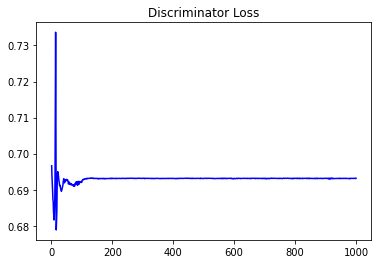

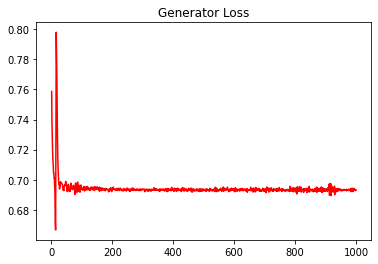

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06490702413474267


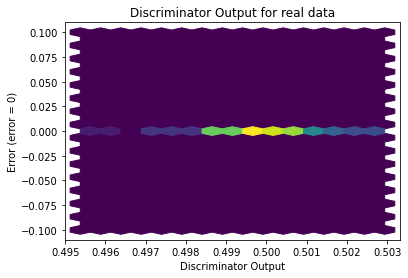

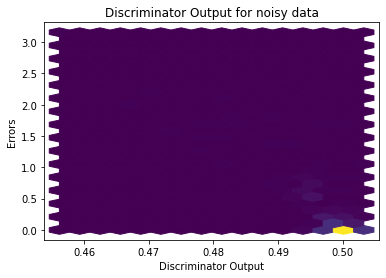

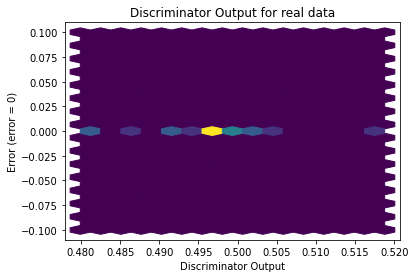

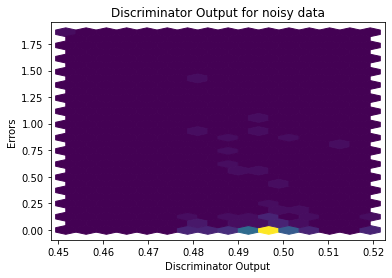

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


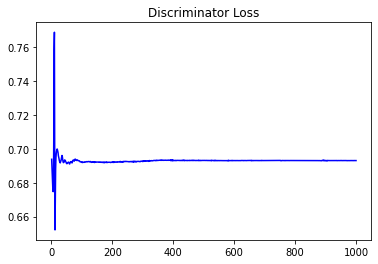

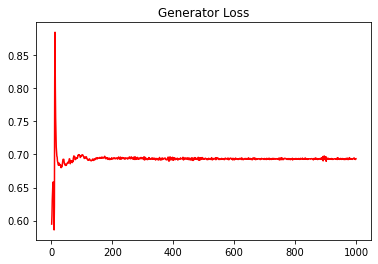

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09544995034780707


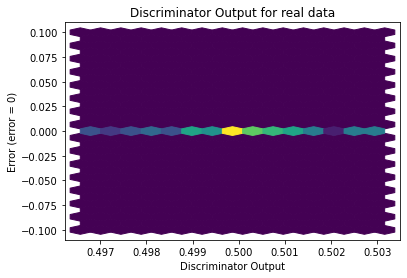

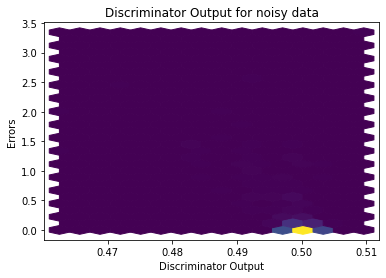

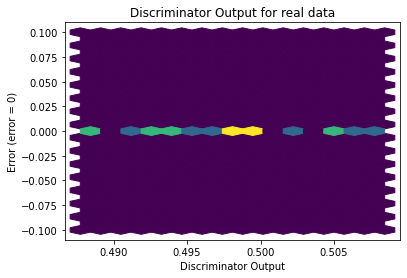

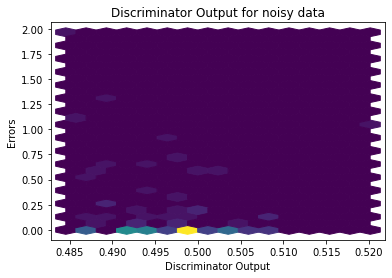

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1241]], requires_grad=True)
